# Введение в анализ данных

Набор данных: [bands dataset](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)


## Постановка задачи

Изучается вопрос появления лишних полос на бумаге при печати на прокатном принтере. На основании параметров, представленных в наборе данных, необходимо попытаться научиться предсказывать появление полос и выявить наиболее значащие факторы.

In [1]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import sklearn as skl
%matplotlib inline

## Часть 1. Подготовка данных

Набор данных представлен в формате '.csv' - Comma Separated Values.

Библиотека Pandas умеет работать с этим форматом. Загрузим с ее помощью набор данных.
Полученная таблица не имеет заголовков столбцов, поэтому их придется добавть вручную. Их можно найти в информации, сопровождающей набор данных.

In [2]:
dataset = pd.read_csv('../datasets/bands-dataset/bands.data')
dataset.columns = [
	"timestamp",
	"cylinder number",
	"customer",
	"job number",
	"grain screened",
	"ink color",
	"proof on ctd ink",
	"blade mfg",
	"cylinder division",
	"paper type",
	"ink type",
	"direct steam",
	"solvent type",
	"type on cylinder",
	"press type",
	"press",
	"unit number",
	"cylinder size",
	"paper mill location",
	"plating tank",
	"proof cut",
	"viscosity",
	"caliper",
	"ink temperature",
	"humifity",
	"roughness",
	"blade pressure",
	"varnish pct",
	"press speed",
	"ink pct",
	"solvent pct",
	"ESA Voltage",
	"ESA Amperage",
	"wax",
	"hardener",
	"roller durometer",
	"current density",
	"anode space ratio",
	"chrome content",
	"band type"
	]

In [3]:
dataset

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
5,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
6,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
7,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,1.5,0,3,1,40,40,103.22,100,band
8,19910114,I320,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,31.8,0,0,3,1,38,40,106.66,100,noband
9,19910114,I337,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,35.9,0,0,3,1,38,40,106.6,100,noband


### 1.1. Содержимое набора данных

Из описания набора имеем:

Размер набора: 512
Число столбцов: 40, из них 20 численных и 20 категориальных:
	 
     1. timestamp: numeric; 19500101 - 21001231
	 2. cylinder number: nominal
	 3. customer: nominal; 
	 4. job number: nominal; 
	 5. grain screened: nominal; yes, no
	 6. ink color: nominal;  key, type 
	 7. proof on ctd ink:  nominal;  yes, no  
	 8. blade mfg: nominal;  benton, daetwyler, uddeholm 
	 9. cylinder division: nominal;  gallatin, warsaw, mattoon 
	10. paper type: nominal;  uncoated, coated, super 
	11. ink type: nominal;  uncoated, coated, cover 
	12. direct steam: nominal; use; yes, no *
	13. solvent type: nominal;  xylol, lactol, naptha, line, other 
	14. type on cylinder:  nominal;  yes, no  
	15. press type: nominal; use; 70 wood hoe, 70 motter, 70 albert, 94 motter 
	16. press: nominal;  821, 802, 813, 824, 815, 816, 827, 828 
	17. unit number: nominal;  1, 2, 3, 4, 5, 6, 7, 8, 9, 10 
	18. cylinder size: nominal;  catalog, spiegel, tabloid 
	19. paper mill location: nominal; north us, south us, canadian, 
				 scandanavian, mid european
	20. plating tank: nominal; 1910, 1911, other 
	21. proof cut: numeric;  0-100 
	22. viscosity: numeric;  0-100 
	23. caliper: numeric;  0-1.0 
	24. ink temperature: numeric;  5-30 
	25. humifity: numeric;  5-120 
	26. roughness: numeric;  0-2 
	27. blade pressure: numeric;  10-75 
	28. varnish pct: numeric;  0-100 
	29. press speed: numeric;  0-4000 
	30. ink pct: numeric;  0-100 
	31. solvent pct: numeric;  0-100 
	32. ESA Voltage: numeric;  0-16 
	33. ESA Amperage: numeric;  0-10 
	34. wax: numeric ;  0-4.0
	35. hardener:  numeric; 0-3.0 
	36. roller durometer:  numeric;  15-120 
	37. current density:  numeric;  20-50 
	38. anode space ratio:  numeric;  70-130 
	39. chrome content: numeric; 80-120 
	40. band type: nominal; class; band, no band *

Пропуски в значениях имеются в 302 строках.

Распределение строк по целевым классам:
 1. 312 без лишних полос (no band)
 1. 200 с лишними полосами (band)
 
 
### 1.2. Проверка входных данных
 
Как можно видеть из таблицы, размер прочитанных данных 540 х 40. Это значит, что 28 строк могут содержать неожиданные данные. Проверим это.

In [4]:
sorted(dataset['timestamp'].unique())

['19900330',
 '19900409',
 '19900414',
 '19900417',
 '19900418',
 '19900425',
 '19900426',
 '19900505',
 '19900507',
 '19900509',
 '19900510',
 '19900511',
 '19900514',
 '19900517',
 '19900518',
 '19900524',
 '19900602',
 '19900603',
 '19900606',
 '19900608',
 '19900611',
 '19900612',
 '19900614',
 '19900615',
 '19900617',
 '19900620',
 '19900621',
 '19900622',
 '19900625',
 '19900626',
 '19900702',
 '19900705',
 '19900706',
 '19900707',
 '19900708',
 '19900710',
 '19900718',
 '19900719',
 '19900723',
 '19900726',
 '19900727',
 '19900730',
 '19900801',
 '19900804',
 '19900805',
 '19900806',
 '19900807',
 '19900809',
 '19900810',
 '19900811',
 '19900812',
 '19900813',
 '19900814',
 '19900818',
 '19900819',
 '19900820',
 '19900821',
 '19900824',
 '19900825',
 '19900830',
 '19900831',
 '19900909',
 '19900910',
 '19900913',
 '19900915',
 '19900920',
 '19900921',
 '19900924',
 '19900926',
 '19901001',
 '19901002',
 '19901003',
 '19901004',
 '19901005',
 '19901006',
 '19901007',
 '19901008',

Действительно, имеется как минимум одна строка, в которой значение параметра `timestamp` отличается по типу от других. Найдем все элементы, не являющиеся числами.

In [5]:
import re
dataset['timestamp'][dataset['timestamp'].transform(lambda x: re.match(r'\d+', x) == None)]

521    tabloid
Name: timestamp, dtype: object

Такие элементы вызывают подозрения на некорректность. Проверим их значения во всей таблице.

In [6]:
dataset[dataset['timestamp'].transform(lambda x: re.match(r'\d+', x) == None)]

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
521,tabloid,?,1910,?,45,0.200,17,84,0.8125,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно видеть, что данные в этом элементе сомнительного характера. 
Их тип отличается от типа, к которому относятся элементы столбцов — он указан в информации о данных. 
Возможно, они попали сюда по ошибке. Так или иначе, они будут мешать при дальнейшем анализе.
Данных, для которых наблюдается такая ситуация не так много — всего одна строка. 
Поэтому, можно удалить ее из набора данных, не навредив при этом общей статистике.

In [7]:
dataset = dataset.drop(521);

In [8]:
dataset['timestamp'] = dataset['timestamp'].astype(np.int32)

### 1.3. Заполнение недостающих значений

Мы проверили только один параметр из 40. Но другие тоже могут содержать некорректные данные. Необходимо проверить и их.
Выберем числовые столбцы:

In [9]:
numeric_data = dataset[
    ['timestamp', 'proof cut', 'viscosity', 'caliper', 
     'ink temperature', 'humifity', 'roughness', 'blade pressure', 
     'varnish pct', 'press speed', 'ink pct', 'solvent pct', 
     'ESA Voltage', 'ESA Amperage', 'wax', 'hardener', 
     'roller durometer', 'current density', 
     'anode space ratio', 'chrome content'
    ]]
numeric_data

,timestamp,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content
0,19910109,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100
1,19910104,62,40,0.433,16,80,?,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100
2,19910104,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100
3,19910111,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100
4,19910104,50,40,0.267,16.8,76,0.4375,28,8.6,1467,53.8,37.6,5,0,2.5,0.8,40,40,103.87,100
5,19910111,50,46,0.3,16.5,75,0.75,30,0,2600,62.5,37.5,6,0,2.5,0.6,30,40,106.67,100
6,19910111,50,46,0.2,16.5,75,0.75,28,0,2600,62.5,37.5,6,0,2.5,1.1,30,40,106.67,100
7,19910112,50,45,0.367,12,70,0.75,60,0,1650,60.2,39.8,1.5,0,3,1,40,40,103.22,100
8,19910114,65,43,0.333,16,75,1,32,22.7,1750,45.5,31.8,0,0,3,1,38,40,106.66,100
9,19910114,65,43,0.2,16,68,0.75,30,15.5,1750,48.5,35.9,0,0,3,1,38,40,106.6,100


И заполним недостающие значения:

In [10]:
for c in numeric_data.columns:
    dataset[c] = pd.to_numeric(dataset[c], errors='coerce')
    dataset[c] = dataset[c].fillna(dataset[c].median(axis=0), axis=0)
dataset

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.000,100.0,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.870,100.0,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.060,100.0,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.670,100.0,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5.0,0.0,2.5,0.8,40.0,40.0,103.870,100.0,noband
5,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,0.6,30.0,40.0,106.670,100.0,noband
6,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,1.1,30.0,40.0,106.670,100.0,noband
7,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,1.5,0.0,3.0,1.0,40.0,40.0,103.220,100.0,band
8,19910114,I320,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,31.8,0.0,0.0,3.0,1.0,38.0,40.0,106.660,100.0,noband
9,19910114,I337,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,35.9,0.0,0.0,3.0,1.0,38.0,40.0,106.600,100.0,noband


Теперь все числовые столбцы заполнены корректными значениями. Для запонения недостающих данных использовались медианные значения, вычисленные по столбцам. 

Аналогичную работу выполним и для категориальных столбцов.

In [11]:
categorial_data = dataset[[c for c in dataset.columns if c not in numeric_data.columns]]
categorial_data

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press,unit number,cylinder size,paper mill location,plating tank,band type
0,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,?,noband
1,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9.0,CATALOG,NorthUS,?,noband
2,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9.0,CATALOG,NorthUS,1910,noband
3,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2.0,TABLOID,?,1910,noband
4,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,2.0,CATALOG,NorthUS,1910,noband
5,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,827,2.0,TABLOID,CANADIAN,1911,noband
6,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,827,9.0,TABLOID,CANAdiAN,1911,noband
7,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,XYLOL,YES,Albert70,802,7.0,CATALOG,NorthUS,1910,band
8,I320,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,815,2.0,CATALOG,NorthUS,1911,noband
9,I337,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,815,9.0,CATALOG,NorthUS,1910,noband


In [12]:
def filler(x):
    if x != '?' and x != 'nan':
        return x.upper()
    else:
        return None

dataset[categorial_data.columns] = categorial_data.astype(str).applymap(filler)
    
for c in categorial_data.columns:
    dataset[c] = dataset[c].fillna(dataset[c].describe()['top'], axis=0)
dataset[categorial_data.columns]

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press,unit number,cylinder size,paper mill location,plating tank,band type
0,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,MOTTER94,821,2.0,TABLOID,NORTHUS,1910,NOBAND
1,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WOODHOE70,815,9.0,CATALOG,NORTHUS,1910,NOBAND
2,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WOODHOE70,816,9.0,CATALOG,NORTHUS,1910,NOBAND
3,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WOODHOE70,816,2.0,TABLOID,NORTHUS,1910,NOBAND
4,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WOODHOE70,816,2.0,CATALOG,NORTHUS,1910,NOBAND
5,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,MOTTER94,827,2.0,TABLOID,CANADIAN,1911,NOBAND
6,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,MOTTER94,827,9.0,TABLOID,CANADIAN,1911,NOBAND
7,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,XYLOL,YES,ALBERT70,802,7.0,CATALOG,NORTHUS,1910,BAND
8,I320,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WOODHOE70,815,2.0,CATALOG,NORTHUS,1911,NOBAND
9,I337,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WOODHOE70,815,9.0,CATALOG,NORTHUS,1910,NOBAND


Мы избавились от некорректных входных данных.

## 2. Первичный анализ данных

Необходимые приготовления данных выполнены. Теперь можно произвести некоторый статистический анализ данных.

In [13]:
dataset.describe(include = 'all')

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
count,5.390000e+02,539,539,539,539,539,539,539,539,539,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539
unique,NaN,428,71,262,2,1,2,2,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,X129,KMART,47103,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOBAND
freq,NaN,5,67,12,330,539,517,538,539,293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313
mean,1.990780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.564638,1.182282,0.034323,2.402041,0.987755,34.697588,39.068646,103.030510,99.601113,NaN
std,8.529311e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.316384,2.365490,0.394231,0.542596,0.365558,4.279980,2.340233,4.975545,1.848962,NaN
min,1.990033e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.000000,0.000000,0.000000,0.000000,0.000000,28.000000,30.000000,83.330000,90.000000,NaN
25%,1.990091e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.950000,0.000000,0.000000,2.400000,0.800000,30.000000,40.000000,100.000000,100.000000,NaN
50%,1.991012e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.500000,0.000000,0.000000,2.500000,1.000000,34.000000,40.000000,103.125000,100.000000,NaN
75%,1.991060e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.200000,1.750000,0.000000,2.600000,1.000000,38.500000,40.000000,106.450000,100.000000,NaN


Уберем из набора признаки, с большой вероятностью не влияющие на появление полос при печати. 
К ним мы отнесем названия компаний, время печати и номер задачи и название цилиндра.
Несомненно, эти факторы могут оказывать важное влияние на результат печати. Однако, мы наивно предположим, что это не так.

In [14]:
data = dataset[[c for c in dataset.columns if c not in ['timestamp', 'customer', 'job number', 'cylinder number']]]

Категориальные признаки приведем к бинарному виду, бинарные превратим в числовые.

In [15]:
nonbinary_categorial_columns = [c for c in categorial_data.columns if c in data.columns and len(data[c].unique()) > 2]
data_nonbinary = pd.get_dummies(data[nonbinary_categorial_columns])

In [16]:
binary_categorial_columns = [c for c in categorial_data.columns if c in data.columns and len(data[c].unique()) == 2]
data_binary = pd.DataFrame()
for c in binary_categorial_columns:
    unique_labels = data[c].unique()
    data_binary[c] = data[c].apply(lambda x: x == unique_labels[1])

Кроме того, из статистических данных можно видеть, что параметры 'ink color' и 'cylinder division' имеют лишь по одному значению.
Соответственно, они не оказывают влияния на результат.

In [17]:
unary_categorial_columns = [c for c in data.columns if len(data[c].unique()) == 1]
#data_unary = data[unary_categorial_columns]

Чиловые параметры нормализуем:

In [18]:
numerical_columns = [c for c in numeric_data.columns if c in data.columns]
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

Объединим данные:

In [19]:
data = pd.concat([data_numerical, data_nonbinary, data_binary], axis=1)
data

,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,...,paper mill location_NORTHUS,paper mill location_SCANDANAVIAN,paper mill location_SOUTHUS,grain screened,proof on ctd ink,blade mfg,direct steam,type on cylinder,plating tank,band type
0,1.165587,-0.617034,0.361551,-0.279392,0.189191,0.128840,-1.263281,0.165732,0.236137,-0.164642,...,1,0,0,False,False,False,False,False,False,False
1,1.982635,-1.365248,2.327305,0.505720,0.189191,0.128840,-0.095742,0.150391,0.082579,-0.373113,...,1,0,0,False,False,False,False,False,False,False
2,0.815424,-1.365248,0.361551,0.505720,-0.457852,-2.196750,-0.095742,0.012324,-1.093673,-0.031979,...,1,0,0,False,False,False,False,False,False,False
3,0.581982,-0.617034,0.361551,1.290832,0.189191,0.128840,-0.095742,-0.846761,0.850368,0.328106,...,1,0,0,True,False,False,False,False,False,False
4,0.581982,-1.365248,-0.126193,1.133809,-0.328443,-1.532296,-0.329250,0.472548,-1.093673,-0.373113,...,1,0,0,False,False,False,False,False,False,False
5,0.581982,-0.617034,0.361551,0.898276,-0.457852,0.128840,-0.095742,-0.846761,2.385945,1.275700,...,0,0,0,True,False,False,False,False,True,False
6,0.581982,-0.617034,-1.116460,0.898276,-0.457852,0.128840,-0.329250,-0.846761,2.385945,1.275700,...,0,0,0,True,False,False,False,False,True,False
7,0.581982,-0.741736,1.351818,-2.634728,-1.104895,0.128840,3.406872,-0.846761,-0.531652,0.839807,...,1,0,0,False,False,False,False,False,False,True
8,2.332799,-0.991141,0.849294,0.505720,-0.457852,1.457749,0.137765,2.635602,-0.224536,-1.946117,...,1,0,0,False,False,False,False,False,True,False
9,2.332799,-0.991141,-1.116460,0.505720,-1.363712,0.128840,-0.095742,1.531064,-0.224536,-1.377562,...,1,0,0,False,False,False,False,False,False,False


In [20]:
data.corr()['band type']

proof cut                           0.038811
viscosity                           0.074966
caliper                            -0.023005
ink temperature                     0.044394
humifity                            0.111723
roughness                          -0.080588
blade pressure                     -0.002341
varnish pct                        -0.111653
press speed                        -0.206680
ink pct                             0.138377
solvent pct                        -0.047784
ESA Voltage                        -0.177304
ESA Amperage                       -0.035864
wax                                -0.035104
hardener                            0.051653
roller durometer                    0.106698
current density                     0.113350
anode space ratio                  -0.005096
chrome content                     -0.091291
paper type_COATED                  -0.148889
paper type_SUPER                    0.248460
paper type_UNCOATED                 0.046397
ink type_C

Посмотрим на структуру данных:

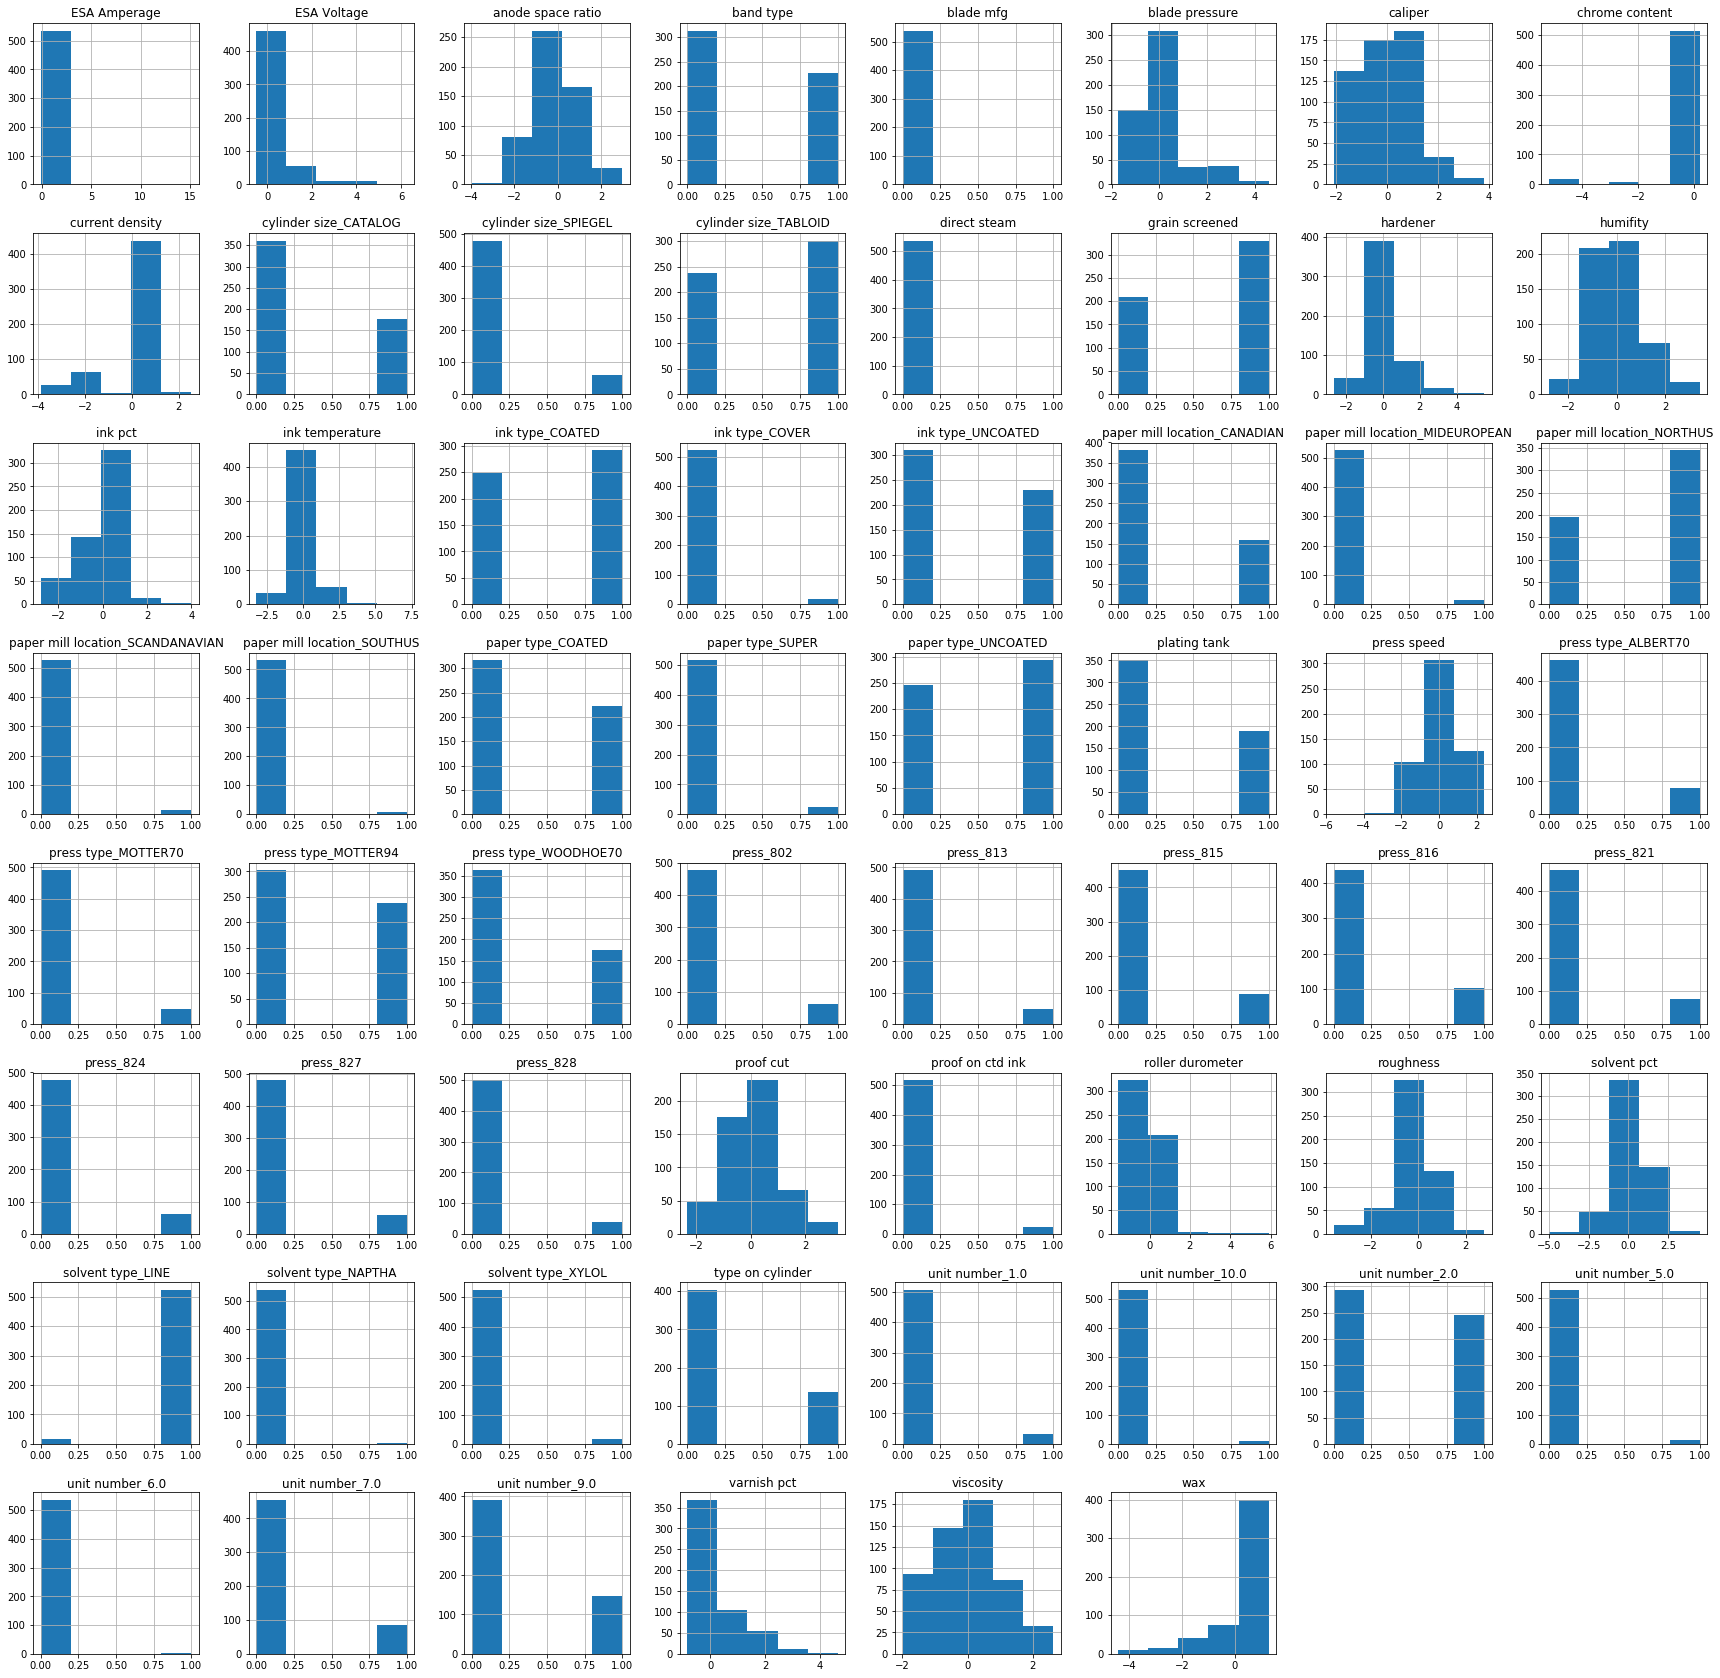

In [21]:
data.hist(figsize=(30, 30), bins=5)
pass

## Часть 3. Обучение модели

Для решения задачи создадим некоторую модель и обучим ее на данных.

Определим X как набор примеров, а y — набор правильных ответов.

In [22]:
X = data.drop('band type', axis=1)
y = data['band type']

Произведем случайное разбиение имеющихся данных на тренировочную и тестовую выборки в соотношении 2:1:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

361 178


Посмотрим на поведение kNN-классификатора с k = 3 и L2 метрикой расстояния. Качество классификации будем измерять как среднее число правильных ответов:

In [24]:
def score_model(classifier):
    train_predictions = classifier.predict(X_train)
    train_accuracy = np.mean(train_predictions == y_train)

    test_predictions = classifier.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)

    print('Train accuracy:', train_accuracy, '(' + str(np.sum(train_predictions == y_train)) + ' / ' + str(len(y_train)) + ')')
    print('Test accuracy:', test_accuracy, '(' + str(np.sum(test_predictions == y_test)) + ' / ' + str(len(y_test)) + ')')

    from sklearn.metrics import confusion_matrix

    print(confusion_matrix(y_test, test_predictions))
    return [classifier, train_predictions, train_accuracy, test_predictions, test_accuracy]

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(3)
classifier = classifier.fit(X_train, y_train)

score_model(classifier)
pass

Train accuracy: 0.903047091413 (326 / 361)
Test accuracy: 0.730337078652 (130 / 178)
[[81 27]
 [21 49]]


### 3.1. Улучшение модели

Модель показывает некоторый результат. Попробуем его улучшить, изменяя параметры модели. Для этого воспользуемся перебором по сетке.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

grid_k = range(1, 15)
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), param_grid={'n_neighbors': grid_k}, cv=100)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 'with k = ' + str(gridClassifier.best_estimator_.n_neighbors))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.775623268698 with k = 7
Test accuracy of the best classifier: 0.724719101124


Можно видеть, что изначальный выбор значения k оказался не так плох. 
При этом, перебор по сетке позволил получить классификатор показывающий 
чуть меньшие результаты на данной тестовой выборке, но более "надежный" в статистическом плане. 
В этой модели значимость признаков одинаковая. 
Для устранения проблем с масштабом была произведена нормализация численных данных.

## Часть 4. Использование простой нейронной сети
В этом разделе производится попытка классификации с помощью неглубокой нейронной сети.

In [27]:
from sklearn.neural_network import MLPClassifier

### 4.1. Однослойная сеть (с одним скрытым весовым/обучаемым слоем)

In [28]:
alpha = 5
classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', 
                           alpha=alpha)
classifier.fit(X_train, y_train)

score_model(classifier)
pass

Train accuracy: 0.781163434903 (282 / 361)
Test accuracy: 0.747191011236 (133 / 178)
[[87 21]
 [24 46]]


Получен некоторый результат. Попытаемся его улучшить перебором гиперпараметров и кросс-валидацией.

Для перебора значений множителя L2-регуляризации alpha используем логарифмичесую шкалу (более плотную у начала и менее плотную у конца). Рассмотрим несколько значений размера скрытого слоя.

In [29]:
grid_alpha = np.logspace(-3, -0.5, 21) * len(X_train.columns)
grid_neurons = [(k,) for k in range(1, 15, 2)]

print("Alpha grid:", grid_alpha)
print("Layer size:", grid_neurons)

Alpha grid: [  0.061        0.08134481   0.10847504   0.1446538    0.19289894
   0.25723487   0.34302821   0.45743547   0.61         0.81344807
   1.08475044   1.44653796   1.92898937   2.57234867   3.43028208
   4.57435468   6.1          8.13448074  10.8475044   14.4653796
  19.28989373]
Layer size: [(1,), (3,), (5,), (7,), (9,), (11,), (13,)]


Переберем различные значения параметра alpha:

In [30]:
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
                              param_grid={'alpha': grid_alpha},
                              cv=10)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 
      'with alpha = ' + str(gridClassifier.best_estimator_.alpha),
      'with neurons = ' + str(gridClassifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.742382271468 with alpha = 1.9289893727 with neurons = (2,)
Test accuracy of the best classifier: 0.775280898876


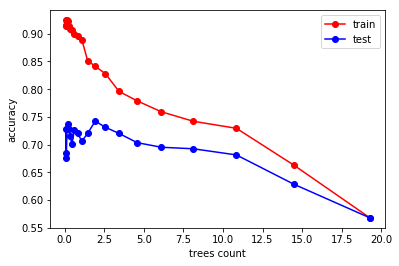

In [31]:
cv_mean_train_scores_by_alpha = sum(gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_alpha))) / \
    (len(gridClassifier.cv_results_["mean_train_score"]) / len(grid_alpha))
mplt.plot(grid_alpha, cv_mean_train_scores_by_alpha, 'r-o', label='train')

cv_mean_test_scores_by_alpha = sum(gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_alpha))) / \
    (len(gridClassifier.cv_results_["mean_test_score"]) / len(grid_alpha))
mplt.plot(grid_alpha, cv_mean_test_scores_by_alpha, 'b-o', label='test')

mplt.xlabel("trees count")
mplt.ylabel("accuracy")
mplt.legend()
pass

Переберем различные размеры скрытого слоя:

In [32]:
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
                              param_grid={'alpha': (gridClassifier.best_estimator_.alpha,), 'hidden_layer_sizes': grid_neurons}, 
                              cv=10)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 
      'with alpha = ' + str(gridClassifier.best_estimator_.alpha),
      'with neurons = ' + str(gridClassifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.745152354571 with alpha = 1.9289893727 with neurons = (7,)
Test accuracy of the best classifier: 0.775280898876


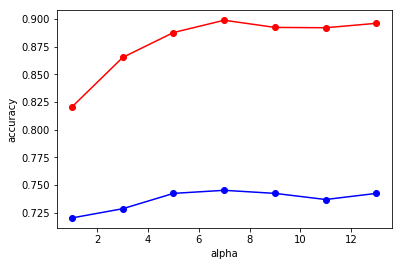

In [33]:
cv_mean_train_scores_by_neurons = sum(gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_neurons))) / \
    (len(gridClassifier.cv_results_["mean_train_score"]) / len(grid_neurons))
mplt.plot(grid_neurons, cv_mean_train_scores_by_neurons, 'r-o')
mplt.xlabel("alpha")
mplt.ylabel("accuracy")

cv_mean_test_scores_by_neurons = sum(gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_neurons))) / \
    (len(gridClassifier.cv_results_["mean_test_score"]) / len(grid_neurons))
mplt.plot(grid_neurons, cv_mean_test_scores_by_neurons, 'b-o')

Рассмотрим разные значения alpha и размера слоя:

In [34]:
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
                              param_grid={'alpha': grid_alpha, 'hidden_layer_sizes': grid_neurons}, 
                              cv=10)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 
      'with alpha = ' + str(gridClassifier.best_estimator_.alpha),
      'with neurons = ' + str(gridClassifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.783933518006 with alpha = 0.081344807362 with neurons = (13,)
Test accuracy of the best classifier: 0.752808988764


In [35]:
gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_alpha))

array([[ 0.89136193,  0.97999509,  0.99907786,  1.        ,  1.        ,
         1.        ,  1.        ,  0.8888852 ,  0.98185168,  0.99845963,
         1.        ,  1.        ,  1.        ,  1.        ,  0.87905979,
         0.98339866,  0.99877111,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 0.87320318,  0.97971296,  0.9993865 ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.86456879,  0.98862097,  0.99876638,
         1.        ,  1.        ,  1.        ,  1.        ,  0.86857358,
         0.97999228,  0.99723169,  0.99969136,  1.        ,  1.        ,
         1.        ],
       [ 0.86028001,  0.96119447,  0.99723075,  1.        ,  1.        ,
         1.        ,  1.        ,  0.85843099,  0.96859333,  0.99137602,
         0.99815383,  0.99969325,  1.        ,  0.99969136,  0.85196656,
         0.95691134,  0.98308245,  0.99261153,  0.99784329,  0.99845963,
         0.99876733],
       [ 0.84395891,  0.9316709 ,  0.9726161 ,  0.98400554

In [36]:
gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_alpha))

array([[ 0.75069252,  0.68975069,  0.74515235,  0.71468144,  0.73961219,
         0.74238227,  0.75623269,  0.75900277,  0.67313019,  0.74515235,
         0.74515235,  0.73407202,  0.75623269,  0.78393352,  0.73684211,
         0.70637119,  0.67867036,  0.72299169,  0.76454294,  0.73130194,
         0.74515235],
       [ 0.73684211,  0.69806094,  0.70914127,  0.73961219,  0.73684211,
         0.74792244,  0.76177285,  0.72022161,  0.71745152,  0.73961219,
         0.73961219,  0.74238227,  0.73961219,  0.75900277,  0.73407202,
         0.70083102,  0.70914127,  0.74792244,  0.72576177,  0.77839335,
         0.74238227],
       [ 0.74515235,  0.72576177,  0.73130194,  0.7534626 ,  0.7700831 ,
         0.76454294,  0.76454294,  0.74515235,  0.69529086,  0.72299169,
         0.77839335,  0.78116343,  0.7534626 ,  0.75069252,  0.75623269,
         0.70083102,  0.73684211,  0.7700831 ,  0.76177285,  0.7534626 ,
         0.7534626 ],
       [ 0.73961219,  0.73130194,  0.73961219,  0.75623269

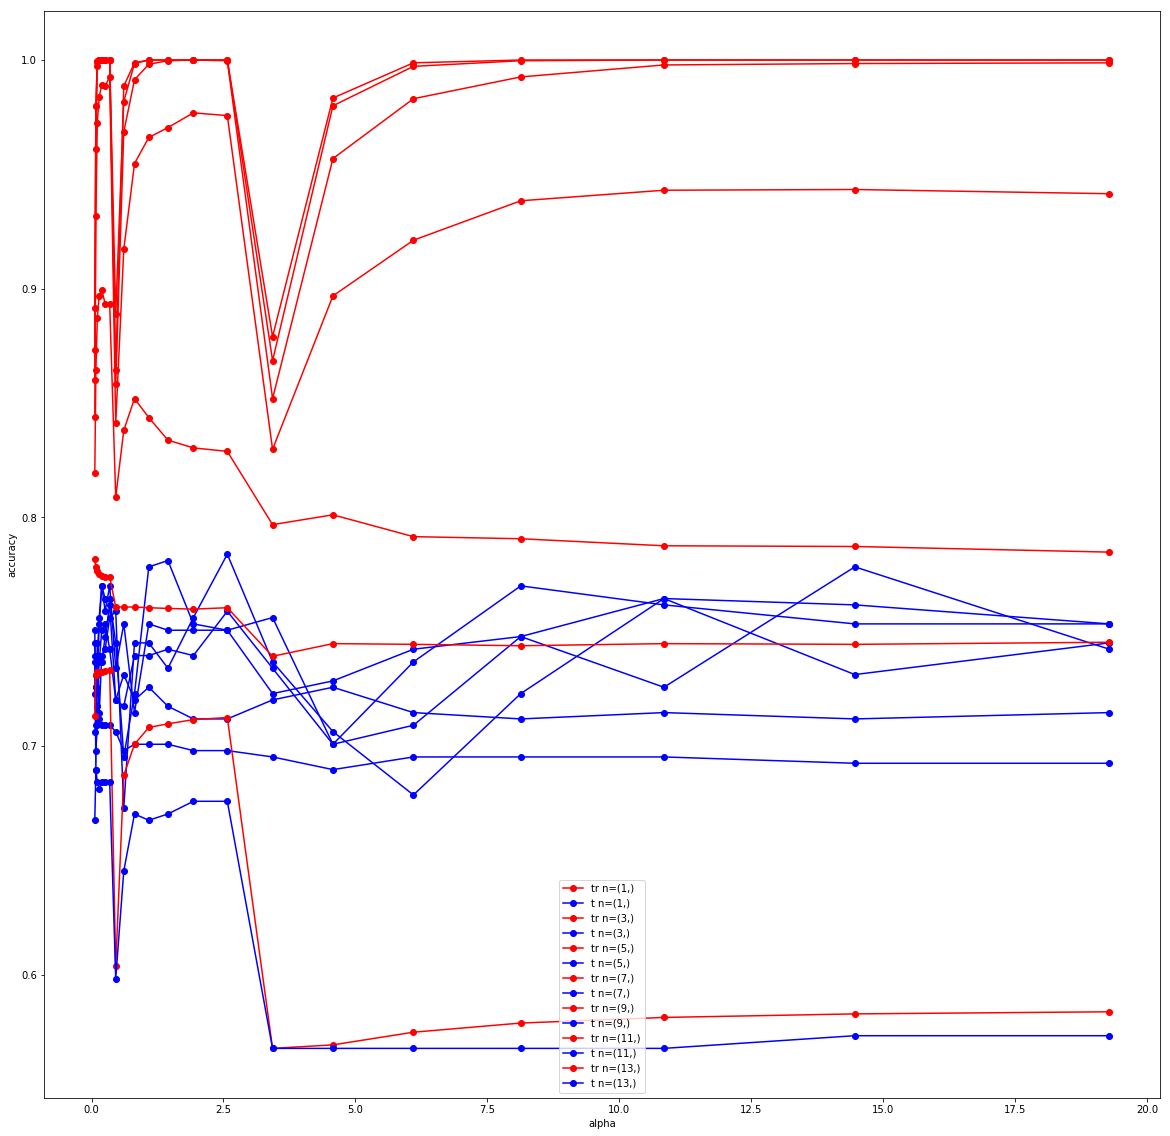

In [37]:
mplt.figure(figsize=(20, 20))
for i in range(len(grid_neurons)):
    cv_mean_train_scores_by_alpha = gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_alpha))[i]
    cv_mean_test_scores_by_alpha = gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_alpha))[i]
    mplt.plot(grid_alpha, cv_mean_train_scores_by_alpha, 'r-o', label='tr n=' + str(grid_neurons[i]))
    mplt.plot(grid_alpha, cv_mean_test_scores_by_alpha, 'b-o', label='t n=' + str(grid_neurons[i]))
              
mplt.xlabel("alpha")
mplt.ylabel("accuracy")
mplt.legend()
pass

Из таблиц результатов можно видеть, что с малой регуляризацией и при большом количестве нейронов в скрытом слое модель быстро переобучается на обучающей выборке. При этом, она показывает невысокие результаты на тестовой выборке. Увеличение множителя резуляризации улучшает ситуацию, но не стоит слишком увлекаться — с некоторого момента начинается недообучение. 

После обучения однослойной сети можно сказать, что ее результаты похожи на результаты KNN классификатора в данной задаче.

## Часть 5. Использование деревьев решений

### 5.1. Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

Создадим классификатор на основе случайного леса.

In [39]:
classifier = RandomForestClassifier(n_estimators=50, oob_score=True, 
                                    max_features='sqrt', 
                                    n_jobs=-1, criterion='entropy')
classifier.fit(X_train, y_train)

score_model(classifier)
print("OOB accuracy estimation:", classifier.oob_score_)
pass

Train accuracy: 1.0 (361 / 361)
Test accuracy: 0.803370786517 (143 / 178)
[[98 10]
 [25 45]]
OOB accuracy estimation: 0.761772853186


Можно видеть, что оценка качества на основе out-of-bag предсказаний близка к результату, полученному на тестовой выборке. При отсутсвии ограничений на высоту дерева сразу происходит переобучение модели. Ограничим высоту деревьев и увеличим требования к разбиениям для того, чтобы избежать переобучения. При небольшом количестве деревьев результаты обучения сильно "плавают" от запуска у запуску (в зависимости от случайного разбиения), поэтому увеличим их количество.

In [40]:
classifier = RandomForestClassifier(n_estimators=1000, oob_score=True, 
                                    max_features='sqrt', max_depth=20, min_impurity_decrease=0.013,
                                    n_jobs=-1, criterion='entropy')
classifier.fit(X_train, y_train)

score_model(classifier)
print("OOB accuracy estimation:", classifier.oob_score_)
pass

Train accuracy: 0.927977839335 (335 / 361)
Test accuracy: 0.797752808989 (142 / 178)
[[98 10]
 [26 44]]
OOB accuracy estimation: 0.759002770083


Попытаемся улучшить результаты перебором параметров модели. Интерес представляет перебор количества деревьев.

In [41]:
grid_estimators = np.logspace(1.5, 4, 7, dtype=np.int32) 
grid_estimators

array([   31,    82,   215,   562,  1467,  3831, 10000])

In [42]:
#gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
#                              param_grid={'n_estimators': grid_estimators}, 
#                              cv=10)
#gridClassifier.fit(X_train, y_train)
# ^ cannot collect oob scores, so just
cvScores = list()
cvBestClassifierId = 0
for i in range(len(grid_estimators)):
    classifier = RandomForestClassifier(n_estimators=grid_estimators[i], oob_score=True, 
                                        max_features='sqrt', max_depth=20, min_impurity_decrease=0.013,
                                        n_jobs=-1, criterion='entropy')
    classifier.fit(X_train, y_train)
    print('CV scoring classifier #' + str(i))
    score = score_model(classifier)
    cvScores.append(score)
    if (cvScores[cvBestClassifierId][2] < score[2]):
        cvBestClassifierId = i
    
cvBestClassifier = cvScores[cvBestClassifierId][0]
print('Achieved train accuracy:', cvScores[cvBestClassifierId][2],
      'with trees count = ' + str(cvBestClassifier.n_estimators))

print('Test accuracy of the best classifier:', cvScores[cvBestClassifierId][4])
print("OOB accuracy of the best classifier:", cvBestClassifier.oob_score_)

CV scoring classifier #0
Train accuracy: 0.908587257618 (328 / 361)
Test accuracy: 0.780898876404 (139 / 178)
[[93 15]
 [24 46]]
CV scoring classifier #1
Train accuracy: 0.930747922438 (336 / 361)
Test accuracy: 0.780898876404 (139 / 178)
[[94 14]
 [25 45]]
CV scoring classifier #2
Train accuracy: 0.93351800554 (337 / 361)
Test accuracy: 0.752808988764 (134 / 178)
[[93 15]
 [29 41]]
CV scoring classifier #3
Train accuracy: 0.925207756233 (334 / 361)
Test accuracy: 0.775280898876 (138 / 178)
[[95 13]
 [27 43]]
CV scoring classifier #4
Train accuracy: 0.927977839335 (335 / 361)
Test accuracy: 0.792134831461 (141 / 178)
[[98 10]
 [27 43]]
CV scoring classifier #5
Train accuracy: 0.925207756233 (334 / 361)
Test accuracy: 0.792134831461 (141 / 178)
[[97 11]
 [26 44]]
CV scoring classifier #6
Train accuracy: 0.927977839335 (335 / 361)
Test accuracy: 0.786516853933 (140 / 178)
[[97 11]
 [27 43]]
Achieved train accuracy: 0.93351800554 with trees count = 215
Test accuracy of the best classifier

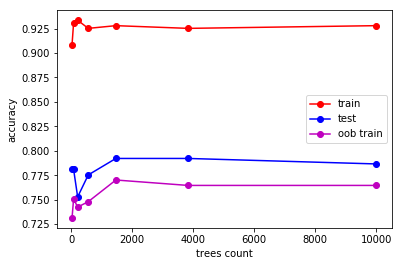

In [43]:
cv_mean_train_scores_by_estimators = [e[2] for e in cvScores]
mplt.plot(grid_estimators, cv_mean_train_scores_by_estimators, 'r-o', label='train')

cv_mean_test_scores_by_estimators = [e[4] for e in cvScores]
mplt.plot(grid_estimators, cv_mean_test_scores_by_estimators, 'b-o', label='test')

cv_mean_oob_scores_by_estimators = [e[0].oob_score_ for e in cvScores]
mplt.plot(grid_estimators, cv_mean_oob_scores_by_estimators, 'm-o', label='oob train')

mplt.xlabel("trees count")
mplt.ylabel("accuracy")
mplt.legend()
pass

Из полученных результатов видно, что модель все еще быстро переобучается, при этом не удается изменением количества деревьев добиться улучшения результатов. Однако, зависимость от каждого конкретного разбиения снижается. Параметр, оказывающий наибольшее влияние на качество - минимальный порог разделения узла.

### 5.2. Extremely Random Forest

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
classifier = ExtraTreesClassifier(n_estimators=100, oob_score=True, bootstrap=True,
                                  max_features='sqrt', max_depth=None, min_impurity_decrease=0.005,
                                  n_jobs=-1, criterion='entropy')
classifier.fit(X_train, y_train)

score_model(classifier)
print("OOB accuracy estimation:", classifier.oob_score_)
pass

Train accuracy: 0.92243767313 (333 / 361)
Test accuracy: 0.76404494382 (136 / 178)
[[94 14]
 [28 42]]
OOB accuracy estimation: 0.700831024931


In [46]:
grid_estimators = np.logspace(1.5, 3.5, 7, dtype=np.int32) 
grid_estimators

array([  31,   68,  146,  316,  681, 1467, 3162])

In [47]:
cvScores = list()
cvBestClassifierId = 0
for i in range(len(grid_estimators)):
    classifier = ExtraTreesClassifier(n_estimators=grid_estimators[i], oob_score=True, bootstrap=True,
                                  max_features='sqrt', max_depth=None, min_impurity_decrease=0.005,
                                  n_jobs=-1, criterion='entropy')
    classifier.fit(X_train, y_train)
    print('CV scoring classifier #' + str(i))
    score = score_model(classifier)
    cvScores.append(score)
    if (cvScores[cvBestClassifierId][2] < score[2]):
        cvBestClassifierId = i
    
cvBestClassifier = cvScores[cvBestClassifierId][0]
print('Achieved train accuracy:', cvScores[cvBestClassifierId][2],
      'with trees count = ' + str(cvBestClassifier.n_estimators))

print('Test accuracy of the best classifier:', cvScores[cvBestClassifierId][4])
print("OOB accuracy of the best classifier:", cvBestClassifier.oob_score_)

CV scoring classifier #0
Train accuracy: 0.916897506925 (331 / 361)
Test accuracy: 0.786516853933 (140 / 178)
[[95 13]
 [25 45]]
CV scoring classifier #1
Train accuracy: 0.897506925208 (324 / 361)
Test accuracy: 0.792134831461 (141 / 178)
[[95 13]
 [24 46]]
CV scoring classifier #2
Train accuracy: 0.919667590028 (332 / 361)
Test accuracy: 0.780898876404 (139 / 178)
[[96 12]
 [27 43]]
CV scoring classifier #3
Train accuracy: 0.916897506925 (331 / 361)
Test accuracy: 0.775280898876 (138 / 178)
[[95 13]
 [27 43]]
CV scoring classifier #4
Train accuracy: 0.919667590028 (332 / 361)
Test accuracy: 0.786516853933 (140 / 178)
[[96 12]
 [26 44]]
CV scoring classifier #5
Train accuracy: 0.916897506925 (331 / 361)
Test accuracy: 0.786516853933 (140 / 178)
[[95 13]
 [25 45]]
CV scoring classifier #6
Train accuracy: 0.919667590028 (332 / 361)
Test accuracy: 0.769662921348 (137 / 178)
[[94 14]
 [27 43]]
Achieved train accuracy: 0.919667590028 with trees count = 146
Test accuracy of the best classifi

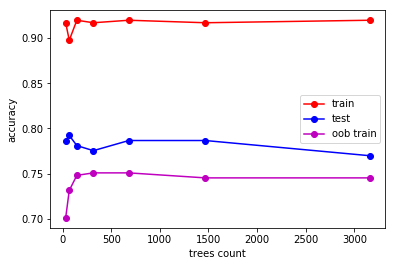

In [48]:
cv_mean_train_scores_by_estimators = [e[2] for e in cvScores]
mplt.plot(grid_estimators, cv_mean_train_scores_by_estimators, 'r-o', label='train')

cv_mean_test_scores_by_estimators = [e[4] for e in cvScores]
mplt.plot(grid_estimators, cv_mean_test_scores_by_estimators, 'b-o', label='test')

cv_mean_oob_scores_by_estimators = [e[0].oob_score_ for e in cvScores]
mplt.plot(grid_estimators, cv_mean_oob_scores_by_estimators, 'm-o', label='oob train')

mplt.xlabel("trees count")
mplt.ylabel("accuracy")
mplt.legend()
pass

Полученные результаты аналогичны предыдущему случаю.

### 5.3. Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adaboostBaseClassifier = RandomForestClassifier(n_estimators=10, max_features='sqrt', criterion='entropy', max_depth=2)
adaboostBaseClassifier.fit(X_train, y_train)
score_model(adaboostBaseClassifier)
pass

Train accuracy: 0.720221606648 (260 / 361)
Test accuracy: 0.73595505618 (131 / 178)
[[100   8]
 [ 39  31]]


In [51]:
classifier = AdaBoostClassifier(base_estimator=adaboostBaseClassifier, n_estimators=20)
classifier.fit(X_train, y_train)
score_model(classifier)
pass

Train accuracy: 0.936288088643 (338 / 361)
Test accuracy: 0.792134831461 (141 / 178)
[[93 15]
 [22 48]]


In [52]:
grid_estimators = np.logspace(1.5, 3, 5, dtype=np.int32) 
grid_estimators

array([  31,   74,  177,  421, 1000])

In [53]:
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
                              param_grid={'n_estimators': grid_estimators}, 
                              cv=3)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 
      'with trees count = ' + str(gridClassifier.best_estimator_.n_estimators))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.783933518006 with trees count = 31
Test accuracy of the best classifier: 0.758426966292


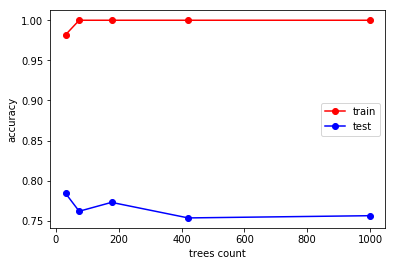

In [54]:
cv_mean_train_scores_by_estimators = sum(gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_estimators))) / \
    (len(gridClassifier.cv_results_["mean_train_score"]) / len(grid_estimators))
mplt.plot(grid_estimators, cv_mean_train_scores_by_estimators, 'r-o', label='train')

cv_mean_test_scores_by_estimators = sum(gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_estimators))) / \
    (len(gridClassifier.cv_results_["mean_test_score"]) / len(grid_estimators))
mplt.plot(grid_estimators, cv_mean_test_scores_by_estimators, 'b-o', label='test')

mplt.xlabel("trees count")
mplt.ylabel("accuracy")
mplt.legend()
pass

### 5.4. Gradient boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
classifier = GradientBoostingClassifier(n_estimators=20, max_depth=5)
classifier.fit(X_train, y_train)
score_model(classifier)
pass

Train accuracy: 0.98891966759 (357 / 361)
Test accuracy: 0.769662921348 (137 / 178)
[[89 19]
 [22 48]]


In [57]:
grid_estimators = np.logspace(1.5, 3, 5, dtype=np.int32) 
grid_estimators

array([  31,   74,  177,  421, 1000])

In [58]:
gridClassifier = GridSearchCV(classifier, scoring=make_scorer(accuracy_score), 
                              param_grid={'n_estimators': grid_estimators}, 
                              cv=10)
gridClassifier.fit(X_train, y_train)

print('Achieved train accuracy:', gridClassifier.best_score_, 
      'with trees count = ' + str(gridClassifier.best_estimator_.n_estimators))

best_test_predictions = gridClassifier.predict(X_test)
best_test_accuracy = np.mean(best_test_predictions == y_test)
print('Test accuracy of the best classifier:', best_test_accuracy)

Achieved train accuracy: 0.778393351801 with trees count = 74
Test accuracy of the best classifier: 0.758426966292


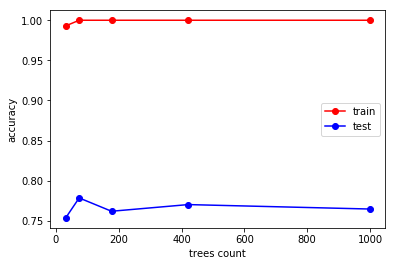

In [59]:
cv_mean_train_scores_by_estimators = sum(gridClassifier.cv_results_["mean_train_score"].reshape(-1, len(grid_estimators))) / \
    (len(gridClassifier.cv_results_["mean_train_score"]) / len(grid_estimators))
mplt.plot(grid_estimators, cv_mean_train_scores_by_estimators, 'r-o', label='train')

cv_mean_test_scores_by_estimators = sum(gridClassifier.cv_results_["mean_test_score"].reshape(-1, len(grid_estimators))) / \
    (len(gridClassifier.cv_results_["mean_test_score"]) / len(grid_estimators))
mplt.plot(grid_estimators, cv_mean_test_scores_by_estimators, 'b-o', label='test')

mplt.xlabel("trees count")
mplt.ylabel("accuracy")
mplt.legend()
pass

### 5.5. Анализ
Из проведенных экспериментов видно, что деревья решений сильно страдают от переобучения. Необходимо интенсивное применение техник регуляризации для улучшения результатов. Количество слабых классификаторов не так сильно влияет на результат. Агрессивный pruning, уменьшение высоты деревьев, повышение требований к разделению узлов сильно влияют на результаты и требуют повышенного внимания в этих методах.